# Mask R-CNN - Inspect Corn Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize3
from mrcnn.visualize3 import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import corn
import corn_2class
%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases


Using TensorFlow backend.


## Configurations

In [2]:
config = corn_2class.CornConfig()
CORN_DIR = os.path.join(ROOT_DIR, "datasets/corn")


In [3]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 0.7, 'rpn_bbox_loss': 0.7, 'mrcnn_class_loss': 0.9, 'mrcnn_bbox_loss': 0.9, 'mrcnn_mask_loss': 0.7}
MASK_POOL_SIZE                 14
MASK_SHAPE          

## Notebook Preferences

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [7]:
# Load validation dataset
dataset = corn_2class.CornDataset()
dataset.load_corn(CORN_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 127
Classes: ['BG', 'Corn', 'Red Corn Kernel']


## Load Model

In [8]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [10]:
# Set path to corn weights file
weights_path = "C:/Users/shrin/Documents/GitHub/Corn_Detection/logs/appr1/2class_300im_600ep/300im_2/mask_rcnn_corn_2class_0600.h5"

# Or, load the last model you trained
#weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:/Users/shrin/Documents/GitHub/Corn_Detection/logs/appr1/2class_300im_600ep/300im_2/mask_rcnn_corn_2class_0600.h5








## Run Detection

Processing 1 images
image                    shape: (1936, 2592, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 2592.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


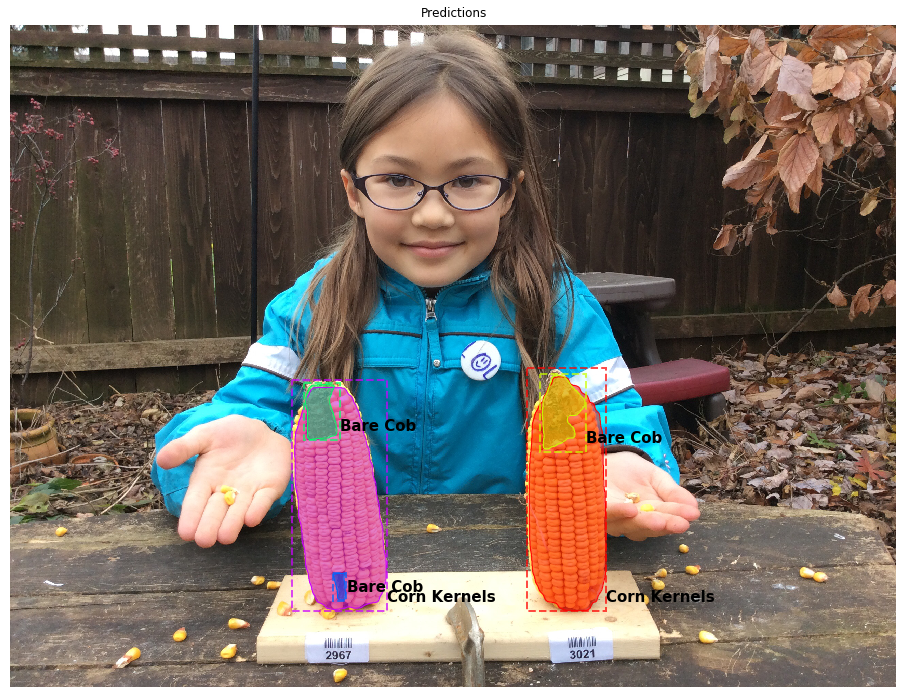

In [11]:
"""image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))"""
import skimage.io
#image = skimage.io.imread(os.path.join(ROOT_DIR, "datasets/corn/val/1197_2_00500_01637_image.JPG"))
image = skimage.io.imread("C:/Users/shrin/Documents/GitHub/Corn_Detection\\datasets\\corn\\test\\1413_2_00389_01185_image.JPG")
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize3.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            ['BG', 'Corn Kernels','Bare Cob'], r['scores'], ax=ax,
                            title="Predictions")

In [12]:
classes = r['class_ids']
masks = r['masks']
regions = r['rois']
print(regions)
print(classes)
print(masks.shape)
offset = round(((image.shape)[1])*0.075)
print('Offset : ',offset)

[[1003 1510 1712 1742]
 [1036  823 1713 1100]
 [1018 1549 1248 1682]
 [1046  858 1213  964]
 [1600  943 1683  982]]
[1 1 2 2 2]
(1936, 2592, 5)
Offset :  194


In [ ]:
visualize3.display_instances(B, r['rois'], r['masks'], r['class_ids'], 
                            ['BG', 'Corn KErnels','Bare Cob'], r['scores'], ax=ax,
                            title="Predictions")

In [15]:
cornList = []
redCornList=[]
for index, roi, class_id in zip(range(len(regions)), regions, classes):
    print(roi, class_id)
    mask = masks[:,:,index]
    if(class_id == 1):
        print(mask.shape)
        cornList.append({'cornRoi' : roi, 'class_id' : class_id, 'mask' : mask, 'mask_pixels' : (mask.sum()), 'redCorns' : []})
    if(class_id == 2):
        redCornList.append({'redCornRoi' : roi, 'class_id' : class_id, 'mask' : mask, 'mask_pixels' : (mask.sum())})
print('CORNS :   \n', cornList)
print('RED CORNS :   \n', redCornList)

[1003 1510 1712 1742] 1
(1936, 2592)
[1036  823 1713 1100] 1
(1936, 2592)
[1018 1549 1248 1682] 2
[1046  858 1213  964] 2
[1600  943 1683  982] 2
CORNS :   
 [{'cornRoi': array([1003, 1510, 1712, 1742]), 'class_id': 1, 'mask': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'mask_pixels': 130577, 'redCorns': []}, {'cornRoi': array([1036,  823, 1713, 1100]), 'class_id': 1, 'mask': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, F

In [16]:
for corn in cornList:
    corn_y1 = corn['cornRoi'][0] - offset
    corn_x1 = corn['cornRoi'][1] - offset
    corn_y2 = corn['cornRoi'][2] + offset
    corn_x2 = corn['cornRoi'][3] + offset
    corn_area = corn['mask_pixels']
    eaten_area = 0
    print('RedCorns Before : ', corn['redCorns'])
    for redCorn in redCornList:
        if((corn_y1 <= redCorn['redCornRoi'][0]) and (corn_x1 <= redCorn['redCornRoi'][1])
        and (corn_y2 >= redCorn['redCornRoi'][2]) and (corn_x2 >= redCorn['redCornRoi'][3])):
           corn['redCorns'].append(redCorn)
           eaten_area += redCorn['mask_pixels']
    percent_eaten = round((eaten_area / corn_area) * 100 , 3)
    corn.update({'percent_eaten' : percent_eaten}) 
    print('RedCorns After : ', corn['redCorns'])
print('Final CORNS : \n', cornList)

RedCorns Before :  []
RedCorns After :  [{'redCornRoi': array([1018, 1549, 1248, 1682]), 'class_id': 2, 'mask': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'mask_pixels': 17441}]
RedCorns Before :  []
RedCorns After :  [{'redCornRoi': array([1046,  858, 1213,  964]), 'class_id': 2, 'mask': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'mask_pixels': 11855}, {'redCornRoi': array([1600,  9

In [17]:
final_rois = []
final_masks = []
final_class = []
final_percent = []
for corn in cornList:
    final_rois.append(corn['cornRoi'])
    final_masks.append(corn['mask'])
    final_class.append(corn['class_id'])
    final_percent.append(corn['percent_eaten'])
print(len(final_rois))
print((final_rois))
#np.reshape(final_rois,(len(final_rois),len(final_rois[0])))
final_rois = np.asarray(final_rois)
final_masks = np.asarray(final_masks)
final_class = np.asarray(final_class)
print((final_masks).shape)
shape = final_masks.shape
print(shape)
final_masks.shape = (shape[1], shape[2], shape[0])
#np.reshape(final_rois, (len(final_rois),len(final_rois)))\
print((final_rois).shape)
print((final_masks).shape)
print((final_class).shape)

2
[array([1003, 1510, 1712, 1742]), array([1036,  823, 1713, 1100])]
(2, 1936, 2592)
(2, 1936, 2592)
(2, 4)
(1936, 2592, 2)
(2,)


In [ ]:
ax2 = get_ax(1)
visualize.display_instances(B, final_rois, final_masks, final_class, 
                            ['BG', 'corn', 'Red Corn Kernel'], final_percent, ax=ax2,
                            title="Predictions", show_mask = False, show_bbox = True)

In [ ]:
print(results[0]['masks'][:,:,0].shape,r['class_ids'][0], r['scores'][0])
count0 =(results[0]['masks'][:,:,0]).sum()
print(count0)
print(results[0]['masks'][:,:,1].shape, r['class_ids'][1], r['scores'][1])
count1 =(results[0]['masks'][:,:,1]).sum()
print(count1)
print(results[0]['masks'][:,:,2].shape, r['class_ids'][2], r['scores'][2])
count2 = (results[0]['masks'][:,:,2]).sum()
print(count2)
print(results[0]['masks'][:,:,3].shape, r['class_ids'][3], r['scores'][3])
count3 =(results[0]['masks'][:,:,3]).sum()
print(count3)
print(count1*100/count0)
print(count3*100/count2)

In [ ]:
count3 = 0
for i in np.nditer(results[0]['masks'][:,:,3]):
    #for j in range(1024):
    if(i == True):
           #print(i,j, results[0]['masks'][i,j,1])
        count3 += 1
print(count3)

In [ ]:
(results[0]['masks'][:,:,3]).sum()

In [ ]:
#y1 x1 y2 x2
print(results[0]['rois'][0],r['class_ids'][0], r['scores'][0])
x00 =(results[0]['rois'][0][1])
y00 =(results[0]['rois'][0][0])
x01 =(results[0]['rois'][0][3])
y01 = (results[0]['rois'][0][2])
area0=(x01-x00)*(y01-y00)
print(area0)

print(results[0]['rois'][1],r['class_ids'][1], r['scores'][1])
x10 =(results[0]['rois'][1][1])
y10 =(results[0]['rois'][1][0])
x11 =(results[0]['rois'][1][3])
y11 = (results[0]['rois'][1][2])
area1=(x11-x10)*(y11-y10)
print(area1)

print(results[0]['rois'][2],r['class_ids'][2], r['scores'][2])
x20 =(results[0]['rois'][2][1])
y20 =(results[0]['rois'][2][0])
x21 =(results[0]['rois'][2][3])
y21 = (results[0]['rois'][2][2])
area2=(x21-x20)*(y21-y20)
print(area2)

print(results[0]['rois'][3],r['class_ids'][3], r['scores'][3])
x30 =(results[0]['rois'][3][1])
y30 =(results[0]['rois'][3][0])
x31 =(results[0]['rois'][3][3])
y31 = (results[0]['rois'][3][2])
area3=(x31-x30)*(y31-y30)
print(area3)

print(area1*100/area0)
print(area3*100/area2)
'''print(results[0]['rois'][:,:,1].shape, r['class_ids'][1], r['scores'][1])
count1 =(results[0]['rois'][:,:,1]).sum()
print(count1)
print(results[0]['rois'][:,:,2].shape, r['class_ids'][2], r['scores'][2])
count2 = (results[0]['rois'][:,:,2]).sum()
print(count2)
print(results[0]['rois'][:,:,3].shape, r['class_ids'][3], r['scores'][3])
count3 =(results[0]['rois'][:,:,3]).sum()
print(count3)
print(count3*100/count0)
print(count2*100/count1)'''

In [ ]:
from PIL import Image

[295, 301, 670, 417],
filename = "C:\\Users\\shrin\\Documents\\GitHub\\Mask_RCNN\\Mask_RCNN\\datasets\\corn\\val\\1053_2_00371_01150_20151127_130617.jpg"
im = Image.open(filename)
w,h = im.size
print(w)
print(h)
im = im.resize((1024,1024))
w,h = im.size
print(w)
print(h)
im.crop((301, 150, 417, 820))

In [ ]:
r['masks'][:2][0][500]

In [ ]:
_,ax = plt.subplots(1, figsize=(16,16))
auto_show = True
height, width = image.shape[:2]
ax.set_ylim(height + 10, -10)
ax.set_xlim(-10, width + 10)
ax.axis('off')
ax.set_title('Cropped')
ax.imshow(image)
if auto_show:
   plt.show()